<a href="https://colab.research.google.com/github/Anoushehm/intro-ml-course-winter2026/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAD5016 - Project - Phase #2 - High-fidelity
**Project:** This colab file aims to answer the following research questions:

1.   To evaluate the independent predictive capacity of four distinct clinical domains (chronic diseases, physiological biomarkers, major health events, and medication exposures) for the diagnosis of depression and anxiety among Ontario adults.
2.   To investigate the comparative performance and potential synergistic effects of these feature sets when utilized in isolation versus in various integrated combinations.
3.    To determine whether the optimal set of predictors remains consistent across different diagnostic definitions, specifically comparing individual diagnoses of depression or anxiety against a composite psychiatric outcome.


 **Data:** answer to this question, we will use the the Canadian Primary Care Sentinel Surveillance Network (CPCSSN)1, which contains line-level clinical data collected in primary care settings across Ontario. The study population includes individuals aged 18 years and older.


**Programmer:** Anousheh, Valeria

**Team Number:** 7


**Date started:** February 20th, 2026

**Last update:** February 26th, 2026

# Table of Content


1.   Setup
2.   Import and explore data
3.



# 0. Setup

In [2]:
# Import libraries we need
!pip install category_encoders
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.7 MB/s eta 0:00:00


# 1. Import and explore the data

In [3]:
# Import data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/HAD5016-Project/TMU_DM_808K_R1.csv'
cpc_RAW = pd.read_csv(file_path)

# View the first few rows of the dataset
cpc_RAW.head()

Mounted at /content/drive


/tmp/ipython-input-3588437385.py:5: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  cpc_RAW = pd.read_csv(file_path)


,Age_at_Exam,Sex,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,...,duration_b_R1_[corticosteroid]_Days,total_b_R1_[corticosteroid]_Records,first_b_R1_[1stlineantidiabetic],first_StartDate_b_R1_[1stlineantidiabetic],first_StopDate_b_R1_[1stlineantidiabetic],last_b_R1_[1stlineantidiabetic],last_StartDate_b_R1_[1stlineantidiabetic],last_StopDate_b_R1_[1stlineantidiabetic],duration_b_R1_[1stlineantidiabetic]_Days,total_b_R1_[1stlineantidiabetic]_Records
0,69,Male,140.0,2010-03-18,26.000000,2010-12-17,3.35,2010-03-06,1.03,2010-03-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56,Female,120.0,2011-11-03,24.000000,2011-11-03,4.01,2011-10-04,1.84,2011-10-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,Female,100.0,2014-02-21,51.195667,2014-02-21,3.11,2014-02-24,1.26,2014-02-24,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,Female,138.0,2013-07-04,67.794421,2013-07-04,2.96,2013-08-02,1.09,2013-08-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49,Male,141.0,2013-03-13,34.000000,2013-01-24,4.06,2013-01-24,1.34,2013-01-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of observations: 808921
Number of duplicated observations: 63452
Percentage of duplicated rows: 7.84%
['Age_at_Exam', 'Sex', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS', 'FBS_Date', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date', 'Diabetes', 'Depression', 'Depression_OnsetDate', 'HTN', 'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date', 'Patient_ID', 'DM_OnsetDate', 'DM_Onset_Revised_1YrPrior', '[Amputation)', '[Amputation_Date]', '[Anxiety)', '[Anxiety_Date]', '[Arrhythmia)', '[Arrhythmia_Date]', '[AtrialFibrillation)', '[AtrialFibrillation_Date]', '[Blindness)', '[Blindness_Date]', '[CABG)', '[CABG_Date]', '[CAD)', '[CAD_Date]', '[Cancer)', '[Cancer_Date]', '[Cardiomyopathy)', '[Cardiomyopathy_Date]', '[Cataract)', '[Cataract_Date]', '[CKD)', '[CKD_Date]', '[Deceased)', '[Deceased_Date]', '[Depression)', '[Depression_Date]', '[DiabeticFootUlcer)', '[DiabeticFootUlcer_Date]', '[Dialysis)', '[Di

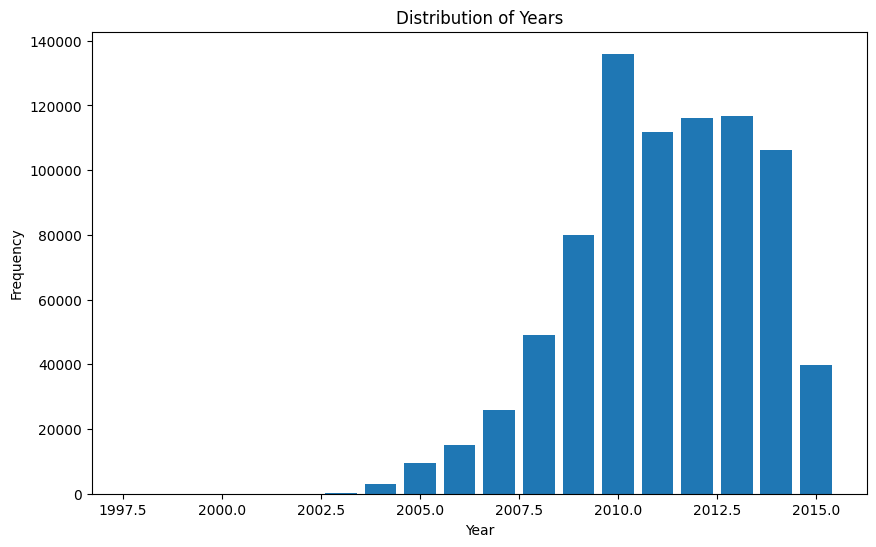

Number of unique patients: 171619


NameError: name 'years_per_patient' is not defined

In [4]:
# Count the number of observations
num_observations = len(cpc_RAW)
print(f"Number of observations: {num_observations}")

# Count the number of duplicated observations
num_duplicates = cpc_RAW.duplicated().sum()
print(f"Number of duplicated observations: {num_duplicates}")

# Calculate the percentage of duplicated rows
percentage_duplicates = (num_duplicates / num_observations) * 100
print(f"Percentage of duplicated rows: {percentage_duplicates:.2f}%")

# List the name of all features
feature_names = cpc_RAW.columns.tolist()
print(feature_names)

# Count observations per year
year_counts = cpc_RAW['Year'].value_counts().sort_index()

# Plot observations by year
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

# Count the number of unique patient_id in the dataset
num_unique_patients = cpc_RAW['Patient_ID'].nunique()
print(f"Number of unique patients: {num_unique_patients}")

# Count how many patients fall into each "number of years followed"
years_followup_counts = years_per_patient.value_counts().sort_index()

plt.figure()
plt.bar(years_followup_counts.index, years_followup_counts.values)
plt.xlabel('Number of Years')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Years per Patient')
plt.show()

# Count how many patients has more than one record in dataset
multiple_records_count = (years_per_patient > 1).sum()
print(f"Number of patients with multiple records: {multiple_records_count}")

# Count the percentage of patients who have two or more records
percentage_multiple_records = (multiple_records_count / num_unique_patients) * 100
print(f"Percentage of patients with multiple records: {percentage_multiple_records:.2f}%")

# Create a histogram for Age_at_Exam variable
plt.figure(figsize=(10, 6))
plt.hist(cpc_RAW['Age_at_Exam'], bins=20, edgecolor='black')
plt.xlabel('Age at Exam')
plt.ylabel('Frequency')
plt.title('Distribution of Age at Exam')
plt.show

# Create a histogram for bmi
plt.figure(figsize=(10, 6))
plt.hist(cpc_RAW['BMI'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# List variables that we want to investigate their biological plausibility
variables = [
    'BMI',
    'HDL',
    'LDL',
    'TG',
    'Total_Cholesterol',
    'FBS',
    'A1c',
    'sBP'
]

# Define biologically plausible limits
normal_ranges = {
    'BMI': (10, 80),
    'HDL': (0.1, 5),
    'LDL': (0.1, 10),
    'TG': (0.1, 20),
    'Total_Cholesterol': (1, 15),
    'FBS': (1, 30),
    'A1c': (3, 20),
    'sBP': (50, 300)
}

# Create summary table
summary_table = pd.DataFrame({
    'Minimum_Observed': cpc_RAW[variables].min(),
    'Maximum_Observed': cpc_RAW[variables].max()
})

# Add normal ranges
summary_table['Normal_Min'] = summary_table.index.map(lambda x: normal_ranges[x][0])
summary_table['Normal_Max'] = summary_table.index.map(lambda x: normal_ranges[x][1])

# Flag implausible observed values
summary_table['Min_Below_Plausible'] = summary_table['Minimum_Observed'] < summary_table['Normal_Min']
summary_table['Max_Above_Plausible'] = summary_table['Maximum_Observed'] > summary_table['Normal_Max']

print(summary_table)

# Boxplot of BMI, HDL, LDL, TG, Total_Cholesterol, FBS, A1c, and sBP
plt.figure(figsize=(12, 6))
sns.boxplot(data=cpc_RAW[variables])
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of Selected Variables')
plt.show()

# 2. Reduce data

In this section, we drop duplicated rows and observations that include biologically implausible values, including:

*   BMI < 10
*   BMI > 100
*   sBP < 50
*   A1c < 3

Save the observations that include biologically implausible observations in a new dataset in addition to all other information we have on those patients

In [1]:
# Drop the duplicated rows and save it in a new data frame
cpc_REDUCED = cpc_RAW.drop_duplicates()
print(f"Number of observations after dropping duplicates: {len(cpc_REDUCED)}")

# Define implausible conditions
implausible_condition = (
    (cpc_REDUCED['BMI'] < 10) |
    (cpc_REDUCED['BMI'] > 100) |
    (cpc_REDUCED['sBP'] < 50) |
    (cpc_REDUCED['A1c'] < 3)
)

# Dataframe containing ONLY implausible rows
cpc_IMPLAUSIBLE = cpc_REDUCED[implausible_condition].copy()

print("Number of implausible observations:", len(cpc_IMPLAUSIBLE))

# Create a datafrane containing information of patients who have SOME
# implausible records
cpc_IMPLAUSIBLE_PATIENTS_ALL_RECORDS = cpc_REDUCED[
    cpc_REDUCED['Patient_ID'].isin(implausible_patients)
].copy()

print("Total records for patients with implausible values:",
      len(cpc_IMPLAUSIBLE_PATIENTS_ALL_RECORDS))

NameError: name 'cpc_RAW' is not defined

In [5]:
# Check variables' types
print(df[['Depression', '[Anxiety)']].dtypes)
counts_dep = df['Depression'].value_counts(dropna=False)
counts_anx = df['[Anxiety)'].value_counts(dropna=False)
print(counts_dep)
print(counts_anx)

Depression      int64
[Anxiety)     float64
dtype: object
Depression
0    638336
1    170585
Name: count, dtype: int64
[Anxiety)
NaN    706185
0.0     68295
1.0     34441
Name: count, dtype: int64


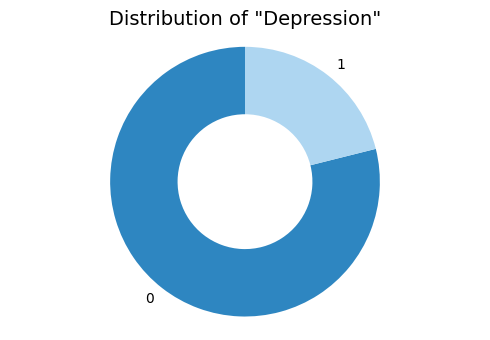

In [6]:
import matplotlib.pyplot as plt
# Distribution of depression
colors = ['#2E86C1', '#AED6F1', '#D5D8DC']
plt.figure(figsize=(5, 3.5))
plt.pie(
    counts_dep.values,
    labels=counts_dep.index.astype(str),
    colors=colors[:len(counts_dep)],
    startangle=90,
    wedgeprops=dict(width=0.5)
)
plt.axis('equal')
plt.title('Distribution of "Depression"', fontsize=14)
plt.tight_layout()
plt.show()

## Data preparation

In [7]:
# Feature Vector Delineation
# Continuous physiological markers
continuous_features = [
    'Age_at_Exam', 'BMI', 'sBP', 'A1c', 'FBS',
    'Total_Cholesterol', 'LDL', 'HDL', 'TG'
]

# Medication exposure durations
duration_features = [
    'duration_b_R1_[1stlineantidiabetic]_Days',
    'duration_b_R1_[2ndline-antidiabetic]_Days',
    'duration_b_R1_[antihtn]_Days',
    'duration_b_R1_[anticholesterol]_Days',
    'duration_b_R1_[corticosteroid]_Days'
]

# Binary clinical diagnostic indicators
binary_features = [
    'Diabetes', 'HTN', '[CAD)', '[MyocardialInfarct)', '[AtrialFibrillation)', '[Arrhythmia)', '[PVD)',
    '[CKD)', '[ESRD)', '[Dialysis)', '[PeritonealDialysis)', '[Microalbuminuria)', '[Proteinuria)', '[Nephropathy)',
    '[Stroke)', '[TIA)', '[RIND)', 'COPD', 'OA', '[Cancer)', '[NAFLD)', '[GERD)', '[Gastroparesis)',
    '[CABG)', '[Stent)', '[HeartTransplant)', '[KidneyTransplant)', '[Amputation)', '[Blindness)'
]

# Qualitative demographic attributes
categorical_features = ['Sex']

# Empirical Feature Validation
expected_features = continuous_features + duration_features + binary_features + categorical_features
valid_features = [col for col in expected_features if col in df.columns]

# Diagnostic check for absent features
missing_from_df = set(expected_features) - set(valid_features)
if missing_from_df:
    print(f"WARNING: The following theoretical features are absent from the matrix: {missing_from_df}\n")

# Finalized Matrix Instantiation
X = df[valid_features]

# Comprehensive Missingness Topology Report
# Synthesizing absolute frequencies and relative proportions of unobserved vectors.
missing_report = pd.DataFrame({
    'Absolute_Missing': X.isnull().sum(),
    'Missing_Percentage (%)': (X.isnull().mean() * 100).round(2)
}).sort_values(by='Missing_Percentage (%)', ascending=False)

print("=== Module 1: Feature Missingness Profile (X Matrix) ===")
# Displaying exclusively the features containing null observations for analytical efficiency.
display(missing_report)

# Statistical Summary: Continuous & Duration Vectors
print("\n=== Module 2: Continuous Variables (Central Tendency & Dispersion) ===")
continuous_valid = [f for f in continuous_features + duration_features if f in valid_features]
continuous_stats = X[continuous_valid].describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
continuous_stats.rename(columns={'50%': 'median'}, inplace=True)
display(continuous_stats)

# Statistical Summary: Binary & Categorical Vectors
print("\n=== Module 3: Binary & Categorical Variables (Frequency Distributions) ===")
categorical_valid = [f for f in binary_features + categorical_features if f in valid_features]
# Coercing to object dtype forces pandas to output categorical descriptive statistics
categorical_stats = X[categorical_valid].astype(object).describe().T[['count', 'unique', 'top', 'freq']]
display(categorical_stats)


=== Module 1: Feature Missingness Profile (X Matrix) ===


,Absolute_Missing,Missing_Percentage (%)
duration_b_R1_[2ndline-antidiabetic]_Days,779652,96.38
duration_b_R1_[1stlineantidiabetic]_Days,740922,91.59
[Microalbuminuria),706185,87.30
[PeritonealDialysis),706185,87.30
[PVD),706185,87.30
[CKD),706185,87.30
[ESRD),706185,87.30
[Dialysis),706185,87.30
[CAD),706185,87.30
[MyocardialInfarct),706185,87.30



=== Module 2: Continuous Variables (Central Tendency & Dispersion) ===


,count,mean,std,min,median,max
Age_at_Exam,808921.0,60.661937,14.062109,18.000000,61.00,90.000000
BMI,808921.0,29.709366,7.049516,5.080655,28.60,240.086698
sBP,808161.0,129.335292,17.142063,40.000000,129.00,260.000000
A1c,364992.0,6.267142,0.974855,0.530000,6.00,17.800000
FBS,808921.0,5.787540,1.496355,2.000000,5.40,34.100000
Total_Cholesterol,792052.0,4.889116,1.156868,0.760000,4.83,20.820000
LDL,803729.0,2.835181,0.989493,0.100000,2.78,10.000000
HDL,800702.0,1.388132,0.415248,0.100000,1.32,5.000000
TG,799025.0,1.517779,0.960199,0.100000,1.30,57.340000
duration_b_R1_[1stlineantidiabetic]_Days,67999.0,1489.867292,1081.835607,0.000000,1327.00,5863.000000



=== Module 3: Binary & Categorical Variables (Frequency Distributions) ===


,count,unique,top,freq
Diabetes,808921,2,0,574457
HTN,808921,2,1,456270
[CAD),102736.0,2.0,0.0,94787.0
[MyocardialInfarct),102736.0,2.0,0.0,93056.0
[AtrialFibrillation),102736.0,2.0,0.0,96838.0
[Arrhythmia),102736.0,2.0,0.0,101859.0
[PVD),102736.0,2.0,0.0,99054.0
[CKD),102736.0,2.0,0.0,102356.0
[ESRD),102736.0,2.0,0.0,102650.0
[Dialysis),102736.0,2.0,0.0,102599.0


## Pipline

*   Split
*   5-fold cross validation
    *   Imputation
    *   SMOTE






In [ ]:
# Data preparation
# Define target phenotypes
target_depression = 'Depression'

# Construct the finalized analytical matrix (X) and target vector (y)
X = df[valid_features].copy()
y = df[target_depression].astype(int)
groups = df['Patient_ID']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

# MODULE 1: DETERMINISTIC MNAR RESOLUTION AND STRATIFIED COHORT BIFURCATION
# Rationale: Alleviating the computational bottleneck associated with N=800,000
# by deterministically resolving Missing Not At Random (MNAR) sparsity prior to
# algorithmic imputation. Subsequently, executing a rigorous subject-level
# partitioning (70/30) to preclude cross-sectional data leakage.

# 1. Deterministic MNAR Imputation (Targeting features with >87% missingness)
mnar_features = [
    'duration_b_R1_[2ndline-antidiabetic]_Days', 'duration_b_R1_[1stlineantidiabetic]_Days',
    'duration_b_R1_[corticosteroid]_Days', 'duration_b_R1_[anticholesterol]_Days',
    'duration_b_R1_[antihtn]_Days', '[Microalbuminuria)', '[PeritonealDialysis)',
    '[PVD)', '[CKD)', '[ESRD)', '[Dialysis)', '[CAD)', '[MyocardialInfarct)',
    '[AtrialFibrillation)', '[Arrhythmia)', '[KidneyTransplant)', '[Amputation)',
    '[Stent)', '[HeartTransplant)', '[GERD)', '[NAFLD)', '[CABG)',
    '[Gastroparesis)', '[Blindness)', '[RIND)', '[Proteinuria)',
    '[Nephropathy)', '[Cancer)', '[Stroke)', '[TIA)'
]

# Apply deterministic zero-imputation inplace to conserve memory allocation
for col in mnar_features:
    if col in X.columns:
        X[col] = X[col].fillna(0)

# 2. Methodological Cohort Partitioning
# Enforcing subject-level isolation via 'Patient_ID'
groups = df['Patient_ID']
gss = GroupShuffleSplit(n_splits=1, test_size=0.30, random_state=42)

# Execute spatial bifurcation
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train = X.iloc[train_idx].copy()
X_test = X.iloc[test_idx].copy()
y_train = y.iloc[train_idx].copy()
y_test = y.iloc[test_idx].copy()

print(f"Bifurcation Complete.\nTraining Manifold: {X_train.shape}\nHold-out Test Manifold: {X_test.shape}")

Bifurcation Complete.
Training Manifold: (565149, 44)
Hold-out Test Manifold: (243772, 44)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# MODULE 2: ARCHITECTING THE HYBRID IMPUTATION AND LEARNING PIPELINE
# Rationale: Constructing a dynamically nested pipeline utilizing imblearn.
# This architecture strictly confines synthetic minority over-sampling (SMOTE)
# and multivariate iterative imputation (MICE) to the active training fold
# during cross-validation, guaranteeing absolute zero data leakage.

# 1. Define distinct spatial transformers for remaining empirical vectors
mar_ind_pipe = ImbPipeline([
    ('imputer', IterativeImputer(max_iter=3, random_state=42, add_indicator=True)),
    ('scaler', StandardScaler())
])

mcar_mice_pipe = ImbPipeline([
    ('imputer', IterativeImputer(max_iter=3, random_state=42)),
    ('scaler', StandardScaler())
])

cat_pipe = ImbPipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 2. Integrate the transformers
# Vectors not explicitly listed here (e.g., pre-filled MNAR variables) bypass transformation
# via the 'passthrough' remainder, preserving their binary/discrete integrity.
preprocessor = ColumnTransformer(transformers=[
    ('mar_ind', mar_ind_pipe, ['A1c']),
    ('mcar_mice', mcar_mice_pipe, ['Total_Cholesterol', 'TG', 'HDL', 'LDL', 'sBP', 'FBS', 'Age_at_Exam', 'BMI']),
    ('cat', cat_pipe, ['Sex'])
], remainder='passthrough')

# 3. Assemble the Ultimate Nested Pipeline
# SMOTE is triggered exclusively during the 'fit' operation.
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    # n_jobs=-1 forces utilization of all available CPU cores for the Random Forest
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# MODULE 3: COMPUTATIONALLY EFFICIENT HYPERPARAMETER OPTIMIZATION (OOM SAFE)
# Rationale: The prior joblib memory leak indicates an Out-of-Memory (OOM)
# failure due to parallel multiprocessing on a massive expanded matrix.
# We mitigate this via sequential CV processing and representative stratified
# subsampling exclusively for the hyperparameter tuning phase.

# 1. Stratified Subsampling for Hyperparameter Tuning
# Rationale: Tuning on 100,000 representative samples provides statistically
# equivalent hyperparameter gradients as 560,000 samples, but utilizes 80% less RAM.
X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train,
    train_size=100000, # Extracts a lightweight 100k cohort
    stratify=y_train,  # Strictly preserves the empirical minority class prevalence
    random_state=42
)
print(f"Subsampled Tuning Matrix allocated: {X_tune.shape}")

# 2. Restrictive Parameter Grid
# Capping tree depth and estimators strictly prevents RAM exhaustion during model building.
param_distributions = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_leaf': [2, 5]
}

# 3. Memory-Safe Randomized Search
search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    n_iter=3,  # Restricted to 3 strategic combinations
    cv=3,      # 3-fold cross-validation
    scoring='roc_auc',
    # CRITICAL FIX: n_jobs=1 disables parallel fold execution to prevent memory collision
    n_jobs=1,
    verbose=3,
    random_state=42
)

# Execute nested optimization strictly on the lightweight subsampled manifold
print("Running CV on tuning subset (Expect completion in 5-10 minutes)...")
search.fit(X_tune, y_tune)

print("\n=== Cross-Validation Complete ===")
print(f"Optimal Hyperparameters Identified: {search.best_params_}")

# MODULE 3.5: FINAL FULL-MANIFOLD TRAINING
# Rationale: Projecting the empirically validated hyperparameters back onto the
# complete 565k training manifold to construct the finalized predictive architecture.

print("\nExecuting final training on the complete 565k training matrix...")
# Extricate the optimal architectural pipeline
best_model = search.best_estimator_

# Fit the optimal model on the ENTIRE training dataset
best_model.fit(X_train, y_train)

print("Final Model fully trained on the complete training space. Ready for evaluation.")

Subsampled Tuning Matrix allocated: (100000, 44)
Running CV on tuning subset (Expect completion in 5-10 minutes)...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 1/3] END classifier__max_depth=10, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.679 total time=  18.5s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 2/3] END classifier__max_depth=10, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.683 total time=  17.3s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 3/3] END classifier__max_depth=10, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.680 total time=  18.8s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 1/3] END classifier__max_depth=15, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.721 total time=  23.1s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 2/3] END classifier__max_depth=15, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.723 total time=  22.9s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 3/3] END classifier__max_depth=15, classifier__min_samples_leaf=5, classifier__n_estimators=100;, score=0.722 total time=  25.6s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 1/3] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__n_estimators=100;, score=0.682 total time=  18.5s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 2/3] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__n_estimators=100;, score=0.684 total time=  18.1s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[CV 3/3] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__n_estimators=100;, score=0.683 total time=  21.6s


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



=== Cross-Validation Complete ===
Optimal Hyperparameters Identified: {'classifier__n_estimators': 100, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 15}

Executing final training on the complete 565k training matrix...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Final Model fully trained on the complete training space. Ready for evaluation.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# MODULE 4: INDEPENDENT EMPIRICAL EVALUATION AND FEATURE ATTRIBUTION
# Rationale: Projecting the optimized model onto the undisturbed hold-out test
# partition to quantify real-world generalizability. Finally, extracting Gini
# importance to evaluate the independent predictive capacity of clinical domains.

# 1. Generate probabilistic arrays and discrete clinical predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 2. Comprehensive Statistical Reporting
print("=== Independent Test Set Performance Metrics ===")
print(classification_report(y_test, y_pred))
print(f"Area Under the ROC Curve (AUC): {roc_auc_score(y_test, y_prob):.4f}\n")

# 3. Feature Importance Extraction
try:
    # Safely extricate the processed feature nomenclature from the pipeline
    processed_features = best_model.named_steps['preprocessor'].get_feature_names_out()

    # Extract structural weights (Gini importance) from the Random Forest architecture
    importances = best_model.named_steps['classifier'].feature_importances_

    # Construct a descending topological matrix for interpretability
    importance_df = pd.DataFrame({
        'Clinical_Feature': processed_features,
        'Predictive_Importance': importances
    }).sort_values(by='Predictive_Importance', ascending=False)

    print("=== Top 15 Predictive Clinical Biomarkers / Events ===")
    display(importance_df.head(15))

except Exception as e:
    print(f"Performance metrics computed successfully. Feature extraction encountered a structural error: {e}")

=== Independent Test Set Performance Metrics ===
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    192535
           1       0.33      0.44      0.38     51237

    accuracy                           0.70    243772
   macro avg       0.58      0.60      0.59    243772
weighted avg       0.73      0.70      0.71    243772

Area Under the ROC Curve (AUC): 0.6519

=== Top 15 Predictive Clinical Biomarkers / Events ===


,Clinical_Feature,Predictive_Importance
8,mcar_mice__Age_at_Exam,0.100344
16,remainder__duration_b_R1_[corticosteroid]_Days,0.086378
14,remainder__duration_b_R1_[antihtn]_Days,0.073397
9,mcar_mice__BMI,0.062124
7,mcar_mice__FBS,0.057472
10,cat__Sex_Female,0.057095
11,cat__Sex_Male,0.056510
6,mcar_mice__sBP,0.056047
15,remainder__duration_b_R1_[anticholesterol]_Days,0.052476
4,mcar_mice__HDL,0.044205
